In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 25 04:10:32 2021

@author: kylei
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from Explainer import Explainer

dataset = pd.read_csv("X_data.csv").iloc[0:10000,:]
#%%
def ExhaustiveGrid(x, y, folds=3):
    '''This function performs KFold like train_model as well as grid search.
            Hopefully this optimizes both the training/test set as well as
            parameters.
    '''
    #lets assume that x and y are x_val and y_val

    param_grid = [{'n_estimators': [100, 1000],  # Parameters to optimize
                   'criterion': ['gini', 'entropy']}]

    # Used to evaluate parameters, recall can also be used but
    scoring = ['precision', 'recall']
    #requires more iterations
    
    best_params = []  # Holds parameters, means, and split indices

    #Starting grid search for metrics
    print()
    print('Best params for: %s_macro' % scoring[0])
    print()

    clf = GridSearchCV(RandomForestClassifier(), param_grid,  # GridSearch obj
                       scoring="%s_macro" % scoring[0])

    clf.fit(x, y.reshape(-1,))  # Fit grid search to train set

    print(clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

    # Store information from iteration
    best_params.append([clf.best_params_, max(means)])

    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print("%0.3f (+- %0.03f) for %r"
              % (mean, std * 2, params))
    
    best_params = np.array(best_params)
    # Finding optimal params from max mean score
    best_index = np.argmax(best_params[:, [1]])

    params = best_params[best_index][0]
    return params

if __name__ == "__main__":
    X = dataset.iloc[:,:-1].values
    Y = dataset.iloc[:,[-1]].values
    #%%
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.10)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=.5)
    
    #%%
    model = RandomForestClassifier(n_estimators=10, criterion="entropy")
    model.fit(x_train, y_train.reshape(-1,))
    pred = model.predict_proba(x_test)
    #%%
    random_index = np.random.randint(0, len(x_test))
    x_orig = x_test[random_index]
    change_class = np.argmin(pred[random_index])
    x_orig_y = y_test[random_index]
    cols = dataset.columns[:-1].values.astype("str")
    class_names = ['stable grasp', 'unstable grasp']
    
    #%%
    explainer = Explainer(x_test, y_test, model)
    res = explainer.explain_instance(sample = x_orig,
                                     change_class = change_class,
                                     plausible = True,
                                     method = 'NSGA2',
                                     method_params = None)
    
    '''
    explainer2 = Explainer(X, Y, model2)
    res2 = explainer2.explain_instance(sample = x_orig,
                                     change_class = change_class,
                                     plausible = True,
                                     method = 'NSGA2',
                                     method_params = None)
    '''

C:\Users\kylei\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\kylei\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  1.61378E+03 |       2 |            - |            -
    2 |      60 |  0.00000E+00 |  2.34986E+02 |       3 |  0.209515320 |            f
    3 |      80 |  0.00000E+00 |  6.583468982 |       3 |  1.39527E-08 |            f
    4 |     100 |  0.00000E+00 |  0.025000000 |       2 |  0.787247098 |        ideal
    5 |     120 |  0.00000E+00 |  0.003250000 |       3 |  0.086071304 |        ideal
    6 |     140 |  0.00000E+00 |  0.000500000 |       3 |  0.007818965 |            f
    7 |     160 |  0.00000E+00 |  0.00000E+00 |       4 |  0.333333333 |        ideal
    8 |     180 |  0.00000E+00 |  0.00000E+00 |       4 |  0.120079903 |        nadir
    9 |     200 |  0.00000E+00 |  0.00000E+00 |       3 |  0.145055311 |        ideal
   10 |     220 |  0.00000E+00 |  0.00000E+00 |       3 |  0.675079743 |        ideal
   11 |     240 |  0.00000E+00 |  0.00000E+00 |       

   95 |    1920 |  0.00000E+00 |  0.00000E+00 |       3 |  0.199328239 |        ideal
   96 |    1940 |  0.00000E+00 |  0.00000E+00 |       3 |  0.023537233 |        ideal
   97 |    1960 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
   98 |    1980 |  0.00000E+00 |  0.00000E+00 |       3 |  0.345553883 |        nadir
   99 |    2000 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  100 |    2020 |  0.00000E+00 |  0.00000E+00 |       3 |  0.212348360 |        ideal
  101 |    2040 |  0.00000E+00 |  0.00000E+00 |       3 |  0.003566010 |            f
  102 |    2060 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  103 |    2080 |  0.00000E+00 |  0.00000E+00 |       3 |  0.002822995 |        ideal
  104 |    2100 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  105 |    2120 |  0.00000E+00 |  0.00000E+00 |       3 |  0.058560955 |        ideal
  106 |    2140 |  0.00000E+00 |  0.00000E+00 |       

  191 |    3840 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000470994 |            f
  192 |    3860 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  193 |    3880 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  194 |    3900 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000315668 |            f
  195 |    3920 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  196 |    3940 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000120775 |            f
  197 |    3960 |  0.00000E+00 |  0.00000E+00 |       4 |  6.14512E-06 |            f
  198 |    3980 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000080384 |            f
  199 |    4000 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000214020 |            f
  200 |    4020 |  0.00000E+00 |  0.00000E+00 |       4 |  7.68312E-09 |            f
  201 |    4040 |  0.00000E+00 |  0.00000E+00 |       4 |  3.56426E-07 |            f
  202 |    4060 |  0.00000E+00 |  0.00000E+00 |       

  287 |    5760 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  288 |    5780 |  0.00000E+00 |  0.00000E+00 |       4 |  0.004483153 |        ideal
  289 |    5800 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000070496 |            f
  290 |    5820 |  0.00000E+00 |  0.00000E+00 |       4 |  0.001147202 |            f
  291 |    5840 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  292 |    5860 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  293 |    5880 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000107302 |            f
  294 |    5900 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  295 |    5920 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000225778 |            f
  296 |    5940 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  297 |    5960 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  298 |    5980 |  0.00000E+00 |  0.00000E+00 |       

  383 |    7680 |  0.00000E+00 |  0.00000E+00 |       3 |  3.93228E-06 |            f
  384 |    7700 |  0.00000E+00 |  0.00000E+00 |       3 |  0.00000E+00 |            f
  385 |    7720 |  0.00000E+00 |  0.00000E+00 |       3 |  0.000245526 |            f
  386 |    7740 |  0.00000E+00 |  0.00000E+00 |       4 |  0.083356610 |            f
  387 |    7760 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  388 |    7780 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  389 |    7800 |  0.00000E+00 |  0.00000E+00 |       4 |  9.08904E-08 |            f
  390 |    7820 |  0.00000E+00 |  0.00000E+00 |       4 |  3.25830E-06 |            f
  391 |    7840 |  0.00000E+00 |  0.00000E+00 |       4 |  0.00000E+00 |            f
  392 |    7860 |  0.00000E+00 |  0.00000E+00 |       4 |  3.22291E-06 |            f
  393 |    7880 |  0.00000E+00 |  0.00000E+00 |       4 |  0.000063501 |            f
  394 |    7900 |  0.00000E+00 |  0.00000E+00 |       

In [2]:
    import streamlit as st
    
    '''Version 2 of change weight display'''
    def find_change_weight(opt_result):
        algorithm = opt_result.history[-1] #Consider only final population
        F_pop = algorithm.pop.get("F") #Get objective values
        F_pop[:,[0]] = (-1)/F_pop[:,[0]] #Converting objectives back into their actual values
        F_pop[:,[1]] = F_pop[:,[1]]*-1
        X_pop = algorithm.pop.get('X').astype(int) #Get pop samples

        deltas = []
        for i in range(X_pop.shape[0]):
            deltas.append(X_pop[i] - x_orig)

        f_x = np.hstack((deltas, F_pop))

        global top5_obj1_df, top5_obj2_df, f_x_df_sliced
        new_cols = []
        for i in range(len(cols)):
            new_cols.append(str(cols[i]))

        format_dict = {}
        for i in new_cols:
            format_dict[i] = "{0:,.2f}"

        new_cols = np.append(new_cols, "obj1")
        new_cols = np.append(new_cols, "obj2")

        f_x_df = pd.DataFrame(data=f_x, columns = new_cols)

        f_x_df = f_x_df.sort_values(by = ["obj1"], ascending = True)
        f_x_df = f_x_df.iloc[np.r_[0:5, -10:-5],:] #Take top and bottom 5
        f_x_df = f_x_df.replace(0, np.nan)

        return f_x_df, format_dict

    df, format_dict = find_change_weight(res)

    df.style.format(format_dict, na_rep = "", ).hide_index()

H1_F1J2_vel,H1_F1J2_eff,H1_F1J3_vel,H1_F1J3_eff,H1_F1J1_vel,H1_F1J1_eff,H1_F3J1_vel,H1_F3J1_eff,H1_F3J2_vel,H1_F3J2_eff,H1_F3J3_vel,H1_F3J3_eff,H1_F2J1_vel,H1_F2J1_eff,H1_F2J3_vel,H1_F2J3_eff,H1_F2J2_vel,H1_F2J2_eff,obj1,obj2
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,-0.88,18.06,10.00,2.10,22.40,-0.41,-3.00,-11.10,-1.42,-1.80,50990451455467448.000000,0.600000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,0.12,18.06,10.00,-5.90,21.40,-0.41,-2.00,-10.10,-1.42,-1.80,50990765661366224.000000,0.600000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,0.12,15.06,10.00,-7.90,22.40,-0.41,-2.00,-10.10,-2.42,-1.80,50991188119663792.000000,0.600000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,-0.88,15.06,10.00,1.10,22.40,-0.41,-2.00,-10.10,-2.42,-1.80,50991294688026808.000000,0.600000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,-0.88,15.06,10.00,1.10,22.40,-0.41,-2.00,-10.10,-2.42,-1.80,50991546544655832.000000,0.600000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,-0.88,15.06,12.00,-5.90,22.40,-0.41,-2.00,-11.10,-1.42,-1.80,232427887423975520.000000,0.900000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,-0.88,15.06,12.00,-6.90,22.40,-0.41,-2.00,-10.10,-1.42,-1.80,232427898061361952.000000,0.900000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,0.12,17.06,12.00,-6.90,21.40,-0.41,-2.00,-10.10,-1.42,-1.80,232428114096673248.000000,0.900000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,0.12,15.06,12.00,-5.90,21.40,-0.41,-2.00,-10.10,-1.42,-1.80,232429993475955872.000000,0.900000
,-0.01,-0.69,0.33,,0.14,-0.10,-0.01,-0.88,15.06,11.00,-5.90,21.40,-0.41,-2.00,-10.10,-1.42,-1.80,232430067744646560.000000,0.900000


H1_F1J2_vel: 0.0
H1_F1J2_eff: 0.0
H1_F1J3_vel: 4.2286
H1_F1J3_eff: 0.0
H1_F1J1_vel: 6.8964
H1_F1J1_eff: 0.0
H1_F3J1_vel: 0.0
H1_F3J1_eff: 0.0
H1_F3J2_vel: 0.0
H1_F3J2_eff: 0.0
H1_F3J3_vel: 0.0
H1_F3J3_eff: 0.0
H1_F2J1_vel: 0.0
H1_F2J1_eff: 0.0
H1_F2J3_vel: 0.0
H1_F2J3_eff: 0.0
H1_F2J2_vel: 0.0
H1_F2J2_eff: 0.0


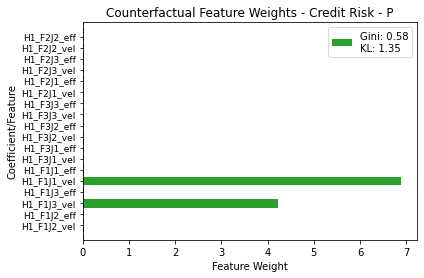

C:\Users\kylei\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kylei\anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in true_divide


Your original class probability is: [0]
------------------------------------------------------------
Minimal change required to reach class unstable grasp
Need to change feature H1_F1J2_vel by: 0.3288 (0.01%)
Need to change feature H1_F1J2_eff by: 0.0031 (0.06%)
Need to change feature H1_F1J3_vel by: 0.0 (0.0%)
Need to change feature H1_F1J3_eff by: -0.0004 (-0.0%)
Need to change feature H1_F1J1_vel by: 0.0002 (inf%)
Need to change feature H1_F1J1_eff by: 0.0016 (1.13%)
Need to change feature H1_F3J1_vel by: -0.0058 (-5.88%)
Need to change feature H1_F3J1_eff by: 0.1151 (2239.65%)
Need to change feature H1_F3J2_vel by: -0.9104 (-731.38%)
Need to change feature H1_F3J2_eff by: 18.4612 (261.56%)
Need to change feature H1_F3J3_vel by: 10.4619 (inf%)
Need to change feature H1_F3J3_eff by: 2.5714 (11.74%)
Need to change feature H1_F2J1_vel by: 23.1269 (3871.24%)
Need to change feature H1_F2J1_eff by: -0.6439 (-156.44%)
Need to change feature H1_F2J3_vel by: -3.8948 (-1773142.63%)
Need to ch

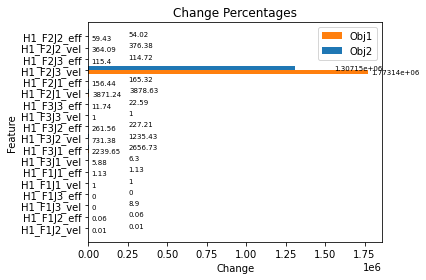

Sparsity: 0.58
############################################################


In [7]:
    from sklearn.linear_model import Lasso
    from sklearn.preprocessing import StandardScaler
    from math import log2

    def gini(vector):
        vec = np.sort(vector)
        N = len(vec)
        l1 = 0

        for i in vec:
            l1 += abs(i)

        summation = 0
        for i in range(N):
            b = abs(vec[i])/l1
            c = (N - (i+1) + .5)/N

            summation += sum(b*c)

        total = 1 - 2*summation

        return total

    def kl_divergence(estimator, x, y):
        global p, q
        coef = abs(estimator.coef_)

        p = np.empty((coef.shape[0],))
        sum_P = sum(coef)
        q = np.empty((coef.shape[0],))

        for i in range(len(coef)):
            p[i] = (coef[i]/sum_P)+1e-2

        sum_Q = sum(p)

        for i in range(len(coef)):
            q[i] = (p[i]**2/sum_Q**2)+1e-2

        global a
        a = np.empty((coef.shape[0],))
        for i in range(len(coef)):
            a[i] = p[i] * log2(p[i]/q[i])

        return -sum(a) #bits

    def print_delta(x_orig, x_prime_ob1, x_prime_ob2, pred1, pred2, cols):
        deltas1 = x_prime_ob1-x_orig
        percent1 = np.round(deltas1/abs(x_orig)*100,2)

        print('Your original class probability is: {base}'.format(base = x_orig_y))

        print('-'*60)

        print('Minimal change required to reach class {c}'
              .format(c=class_names[change_class]))
        for name, change, per in zip(cols, deltas1, percent1):
            print('Need to change feature {n} by: {c} ({p}%)'
                  .format(c = np.round(change,4), n = name, p=per))
        print('Class probability will be: {p1}'.format(p1 = pred1))

        print('-'*60)

        print('Change required to reach class {c} with maximum probability'
              .format(c=class_names[change_class]))
        deltas2 = x_prime_ob2-x_orig
        percent2 = np.round(deltas2/abs(x_orig)*100,2)

        for name, change, per in zip(cols, deltas2, percent2):
            print('Need to change feature {n} by: {c}  ({p}%)'
                  .format(c = np.round(change,4), n = name, p = per))

        print('Class probability will be: {p2}'.format(p2 = pred2))

        return percent1, percent2

    def convert(lst):
        #Used to convert a dict sorted into a list back into a dict
        dct = {lst[i][0]: lst[i][1] for i in range(0, len(lst))}
        return dct

    def find_change_weight(opt_result):
        algorithm = opt_result.history[-1] #Consider only final population

        F_pop = algorithm.pop.get("F") #Get objective values
        X_pop = algorithm.pop.get('X') #Get pop samples

        obj_2 = F_pop[:,[1]]*-1*100
        obj_1 = (F_pop[:,[0]]*-1)

        deltas = []
        for i in range(X_pop.shape[0]):
            deltas.append(X_pop[i] - x_orig)

        deltas = StandardScaler().fit_transform(np.array(deltas))

        '''Fit the regressor to delta and obj2 and get coefficients'''
        """
        regressor = Lasso(alpha = 1) #Intialize
        regressor.fit(deltas, obj_2) #Fit
        coef = regressor.coef_.reshape(-1,1) #Coefficients
        """
        param_grid = {'alpha':np.linspace(.1, 2, 40)}
        clf = GridSearchCV(Lasso(), param_grid,
                           scoring = kl_divergence)

        clf.fit(deltas, obj_2)

        kl_divergence_score = -1*np.round(clf.best_score_,2)
        coef = abs(clf.best_estimator_.coef_)
        coef = coef.reshape(-1,1)

        sparsity_measure = np.round(gini(coef),2)*-1

        for i, j in zip(cols, coef): #Output coefficient per feature
            print('{c}: {co}'.format(c = i, co = np.round(j[0],4)))

        best_sample = X_pop[np.where(obj_2 == max(obj_2))[0][0]]
        best_sample_prediction = model.predict_proba(best_sample.reshape(1,-1)).reshape(-1)

        best_sample1 = X_pop[np.where(obj_1 == max(obj_1))[0][0]]
        best_sample1_prediction = model.predict_proba(best_sample1.reshape(1,-1)).reshape(-1)

        short_cols = cols
        for i in range(len(cols)):
            short_cols[i] = str(cols[i])
        dct = {key: None for key in short_cols}

        for i in range(len(dct)):
            dct[short_cols[i]] = coef[i][0]
        #dct = sorted(dct.items(), key=lambda x:abs(x[1]), reverse=False)
        #dct = convert(dct)

        ticks = list(dct.keys())

        plt.barh(np.arange(0,len(dct.keys())), dct.values(), color = 'tab:green',
                 label = "Gini: {g}\nKL: {k}".format(g = sparsity_measure, 
                                                     k = kl_divergence_score))
        plt.yticks(np.arange(0,len(dct.keys())), ticks, fontsize=9)
        plt.title('Counterfactual Feature Weights - Credit Risk - P')
        plt.axvline(x = 0, color = 'black', linestyle = '--')
        plt.ylabel('Coefficient/Feature')
        plt.xlabel('Feature Weight')
        plt.legend(loc="upper right")

        plt.show()

        ######################################################################
        ##                     Graphing Change Weights                      ##
        ######################################################################

        p1, p2 = print_delta(x_orig, best_sample1, best_sample,
                             best_sample1_prediction, best_sample_prediction,
                             cols)

        for i in range(len(p1)):
            if p1[i] == np.inf:
                p1[i] = 1

            if p2[i] == np.inf:
                p2[i] = 1

        p1 = np.round(abs(p1), 2)
        p2 = np.round(abs(p2), 2)
        x_ = np.arange(len(short_cols))
        width = 0.35

        fig, ax = plt.subplots()
        rects1 = ax.barh(x_ - width/2, p1, width, label = 'Obj1', color = 'tab:orange')
        rects2 = ax.barh(x_ + width/2, p2, width, label = 'Obj2', color = 'tab:blue')

        ax.set_xlabel('Change')
        ax.set_ylabel('Feature')
        ax.set_title('Change Percentages')
        ax.set_yticks(x_)
        ax.set_yticklabels(short_cols)
        ax.legend()

        ax.bar_label(rects1, padding = 3, fontsize = 7)
        ax.bar_label(rects2, padding = 40, fontsize = 7)

        fig.tight_layout()

        plt.show()

        print('Sparsity: {s}'.format(s = sparsity_measure))

        return coef


    coef1 = find_change_weight(res)
    print('#'*60)
    #coef2 = find_change_weight(res2)